In [1]:
library(Signac)
library(Seurat)
library(ggplot2)
library(patchwork)
set.seed(1234)

Attaching SeuratObject



In [2]:
library(TFBSTools)
library(JASPAR2020)
library(motifmatchr)

In [3]:
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
library(RColorBrewer)

In [5]:
library(future)

In [6]:
plan("multisession", workers = 4)
plan()

multisession:
- args: function (..., workers = 4, envir = parent.frame())
- tweaked: TRUE
- call: plan("multisession", workers = 4)

In [7]:
options(future.globals.maxSize = 50 * 1024 ^ 3)

In [8]:
skin <- readRDS("./RDS/240522.E13_PD4_integrated.2-10.reference.motif.chromvar.newcluster.rds")

In [9]:
skin

An object of class Seurat 
361458 features across 45406 samples within 3 assays 
Active assay: peaks (338904 features, 338904 variable features)
 2 other assays present: RNA, chromvar
 3 dimensional reductions calculated: lsi, umap, peakvi

In [10]:
DefaultAssay(skin) <- "chromvar"

In [11]:
Idents(object = skin) <- "label"

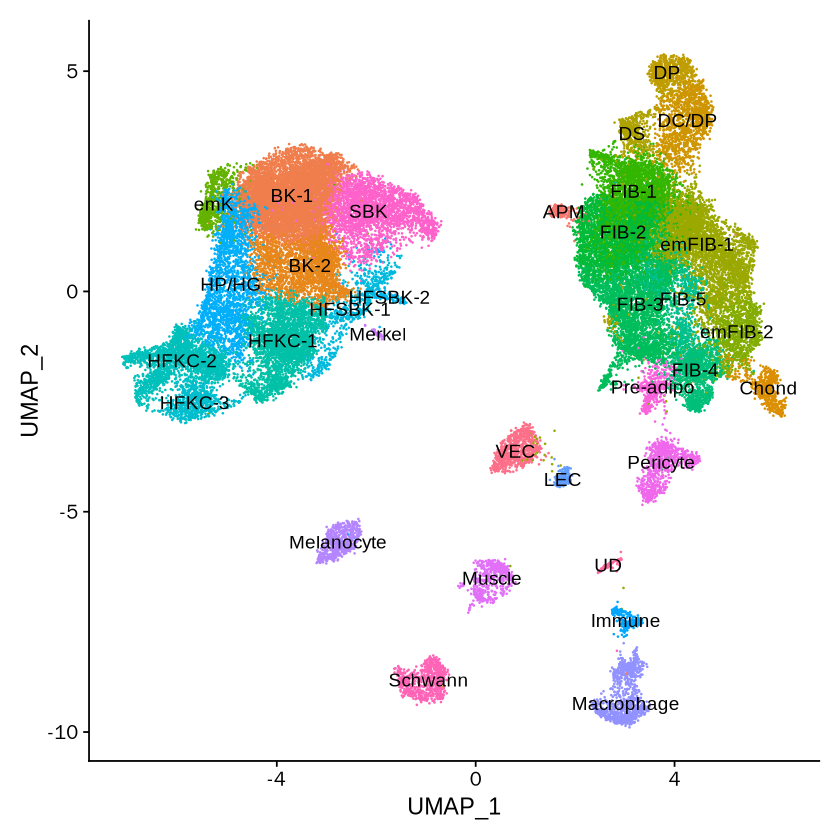

In [12]:
DimPlot(skin, reduction = "umap", label = TRUE, pt.size = 0.1) + NoLegend()

In [13]:
use_color <-c("#ffc486", "#c68441", "#c6c640", "#4c77ab", "#f98284", 
  "#d36a6a", "#75c047", "#d7d0e6", "#be80be", "#d37fa7",
  "#d9d482", "#a8d37f", "#99d5c9", "#aea3d0", "#f6b6d3",
  "#8097cd", "#419dc4", "#8dcad7", "#abdda4", "#d9c8bf",
  "#53bcaa", "#b0a9e4", "#accce4", "#b3e3da", "#feaae4",
  "#87a889", "#b0eb93", "#d0d100", "#49a131", "#1f824c",
  "#00979c", "#808080", "#64b6db"
)

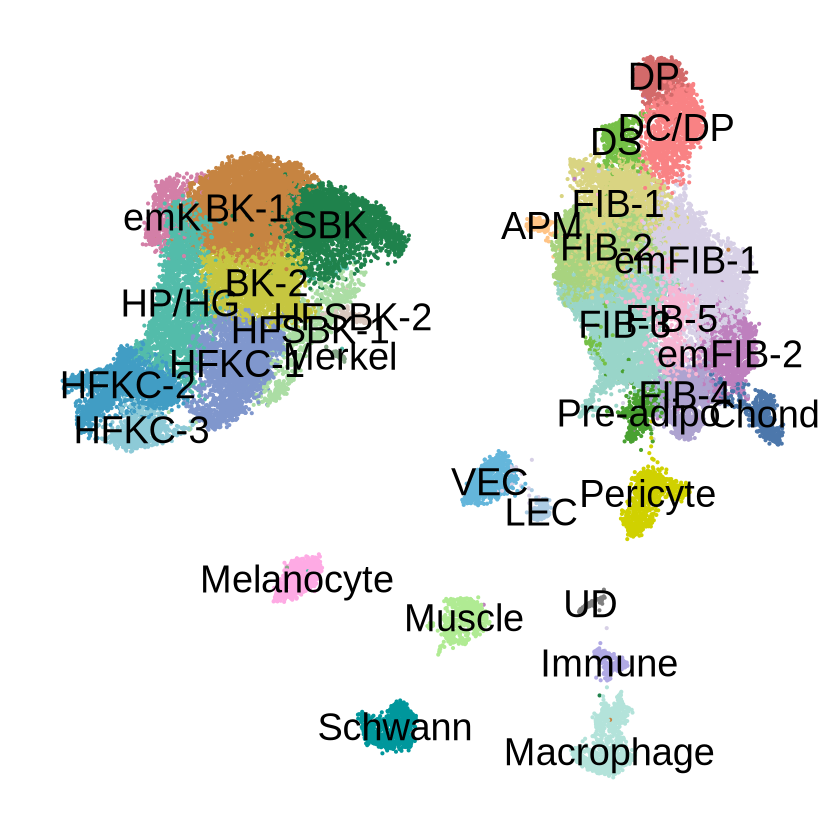

In [14]:
DimPlot(object = skin, label = TRUE, pt.size = 0.5, label.size=8, cols = use_color) + NoLegend() +NoAxes() 

In [12]:
options(repr.plot.width = 18, repr.plot.height = 8)

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the ggseqlogo package.
  Please report the issue at <https://github.com/omarwagih/ggseqlogo/issues>.”


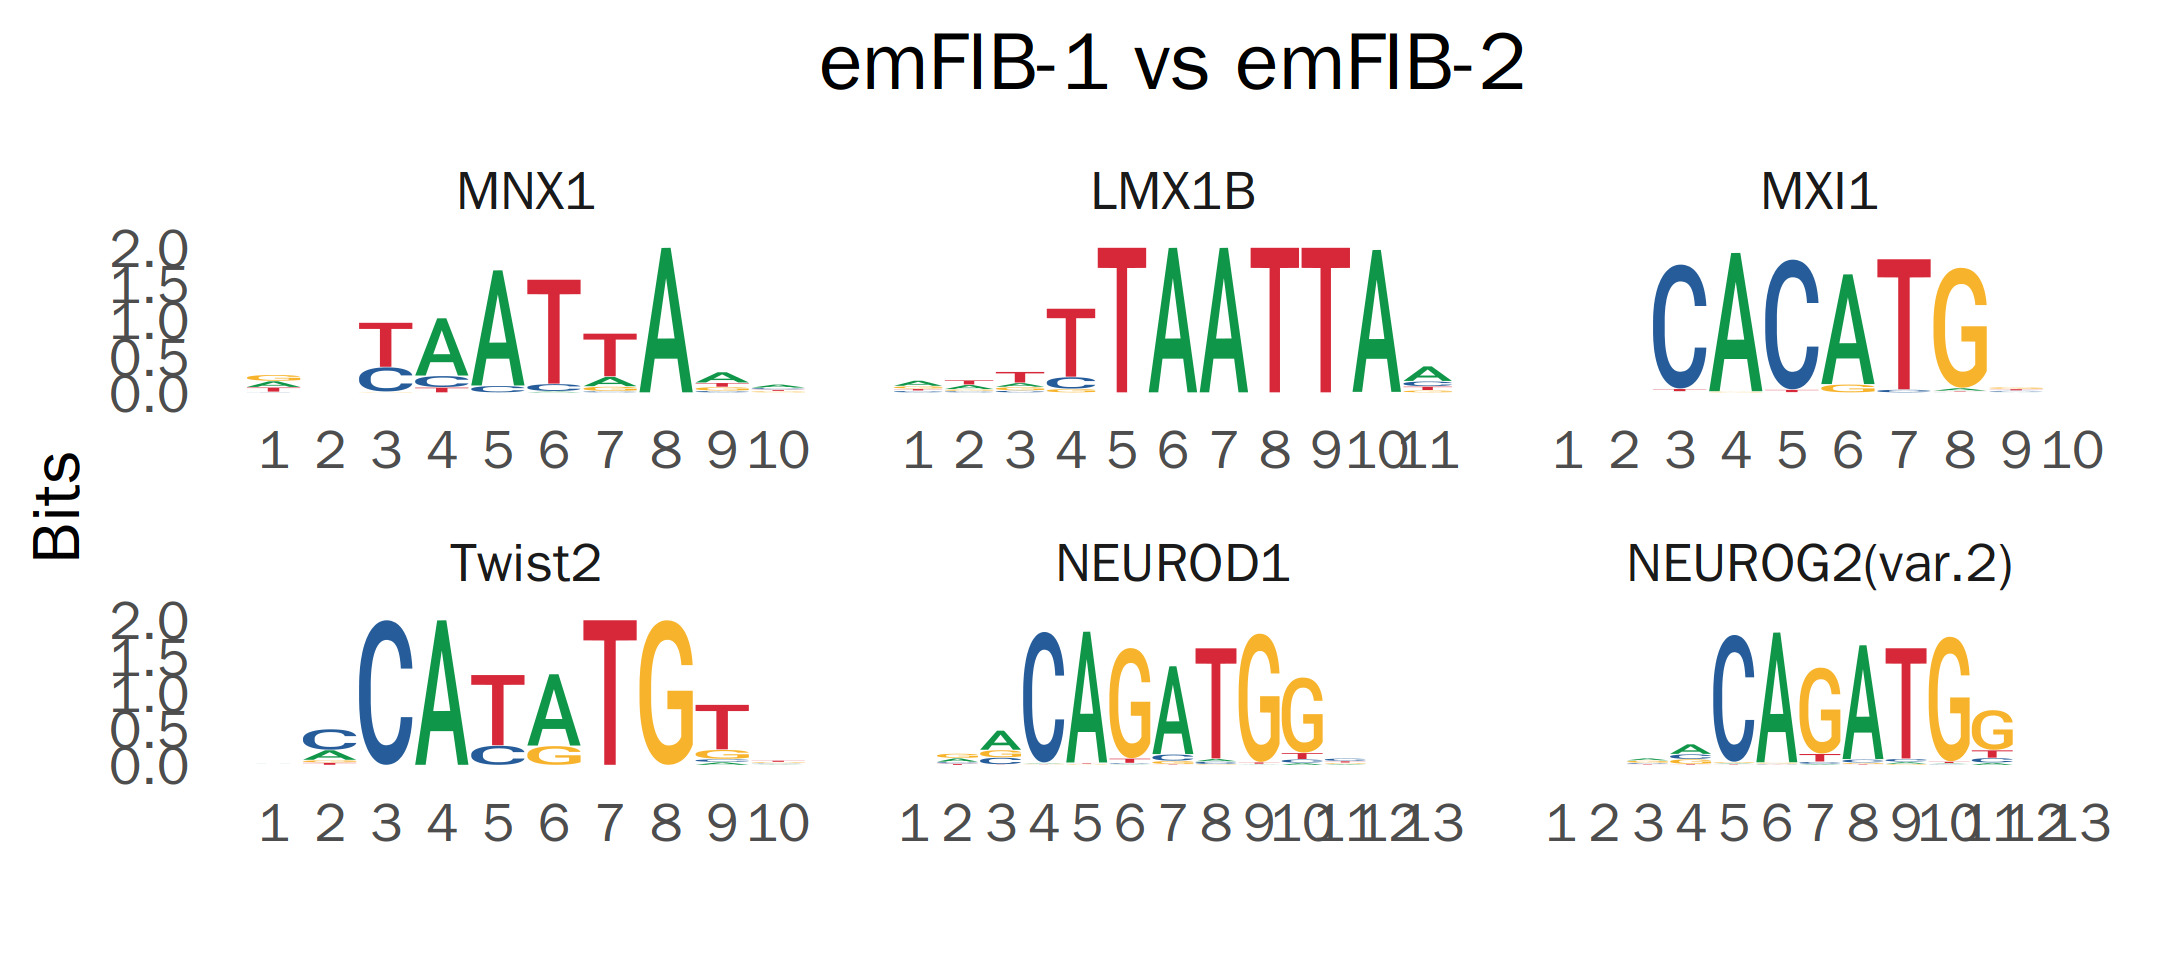

In [13]:
ident1 <- "emFIB-1"
ident2 <- "emFIB-2"

differential.activity <- FindMarkers(
  object = skin,
  ident.1 = ident1,
  ident.2 = ident2,
  only.pos = TRUE,
  mean.fxn = rowMeans,
  fc.name = "avg_diff", min.pct=0.5
)

MotifPlot(
  object = skin,
  motifs = rownames(differential.activity)[1:6],
  assay = 'peaks'
) +theme_minimal(base_size = 40) + ggtitle(paste(ident1, "vs", ident2)) + theme(plot.title = element_text(hjust = 0.5), panel.grid = element_blank())

In [14]:
head(differential.activity)

p_val         avg_diff pct.1 pct.2 p_val_adj    
MA0707.1  0.000000e+00 2.641159 0.518 0.019  0.000000e+00
MA0703.2  0.000000e+00 2.635111 0.534 0.022  0.000000e+00
MA1108.2 4.525544e-308 3.170908 0.991 0.890 3.376056e-305
MA0633.1 4.989554e-256 3.471904 0.994 0.966 3.722207e-253
MA1109.1 5.457363e-225 2.786855 0.994 0.971 4.071193e-222
MA1642.1 7.907397e-223 2.893227 0.993 0.971 5.898918e-220

In [15]:
opts <- list(collection = "CORE", tax_group = 'vertebrates', all_versions = FALSE) 
jaspar_motifs <- getMatrixSet(JASPAR2020, opts)

motif_lookup <- data.frame(
  ID = sapply(jaspar_motifs, name),  # Motif IDs
  Name = names(jaspar_motifs)        # Corresponding gene names
)

head(motif_lookup)

ID           Name    
MA0004.1 Arnt         MA0004.1
MA0006.1 Ahr::Arnt    MA0006.1
MA0019.1 Ddit3::Cebpa MA0019.1
MA0029.1 Mecom        MA0029.1
MA0030.1 FOXF2        MA0030.1
MA0031.1 FOXD1        MA0031.1

In [16]:
differential.activity$ID <- motif_lookup$ID[match(rownames(differential.activity), rownames(motif_lookup))]

head(differential.activity)

p_val         avg_diff pct.1 pct.2 p_val_adj     ID            
MA0707.1  0.000000e+00 2.641159 0.518 0.019  0.000000e+00 MNX1          
MA0703.2  0.000000e+00 2.635111 0.534 0.022  0.000000e+00 LMX1B         
MA1108.2 4.525544e-308 3.170908 0.991 0.890 3.376056e-305 MXI1          
MA0633.1 4.989554e-256 3.471904 0.994 0.966 3.722207e-253 Twist2        
MA1109.1 5.457363e-225 2.786855 0.994 0.971 4.071193e-222 NEUROD1       
MA1642.1 7.907397e-223 2.893227 0.993 0.971 5.898918e-220 NEUROG2(var.2)

In [17]:
ggsave(
  filename = paste0("./Fig3_rxiv/motif_", ident1, "_", ident2, ".motif2.svg"),
  width = 18,
  height = 8
)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


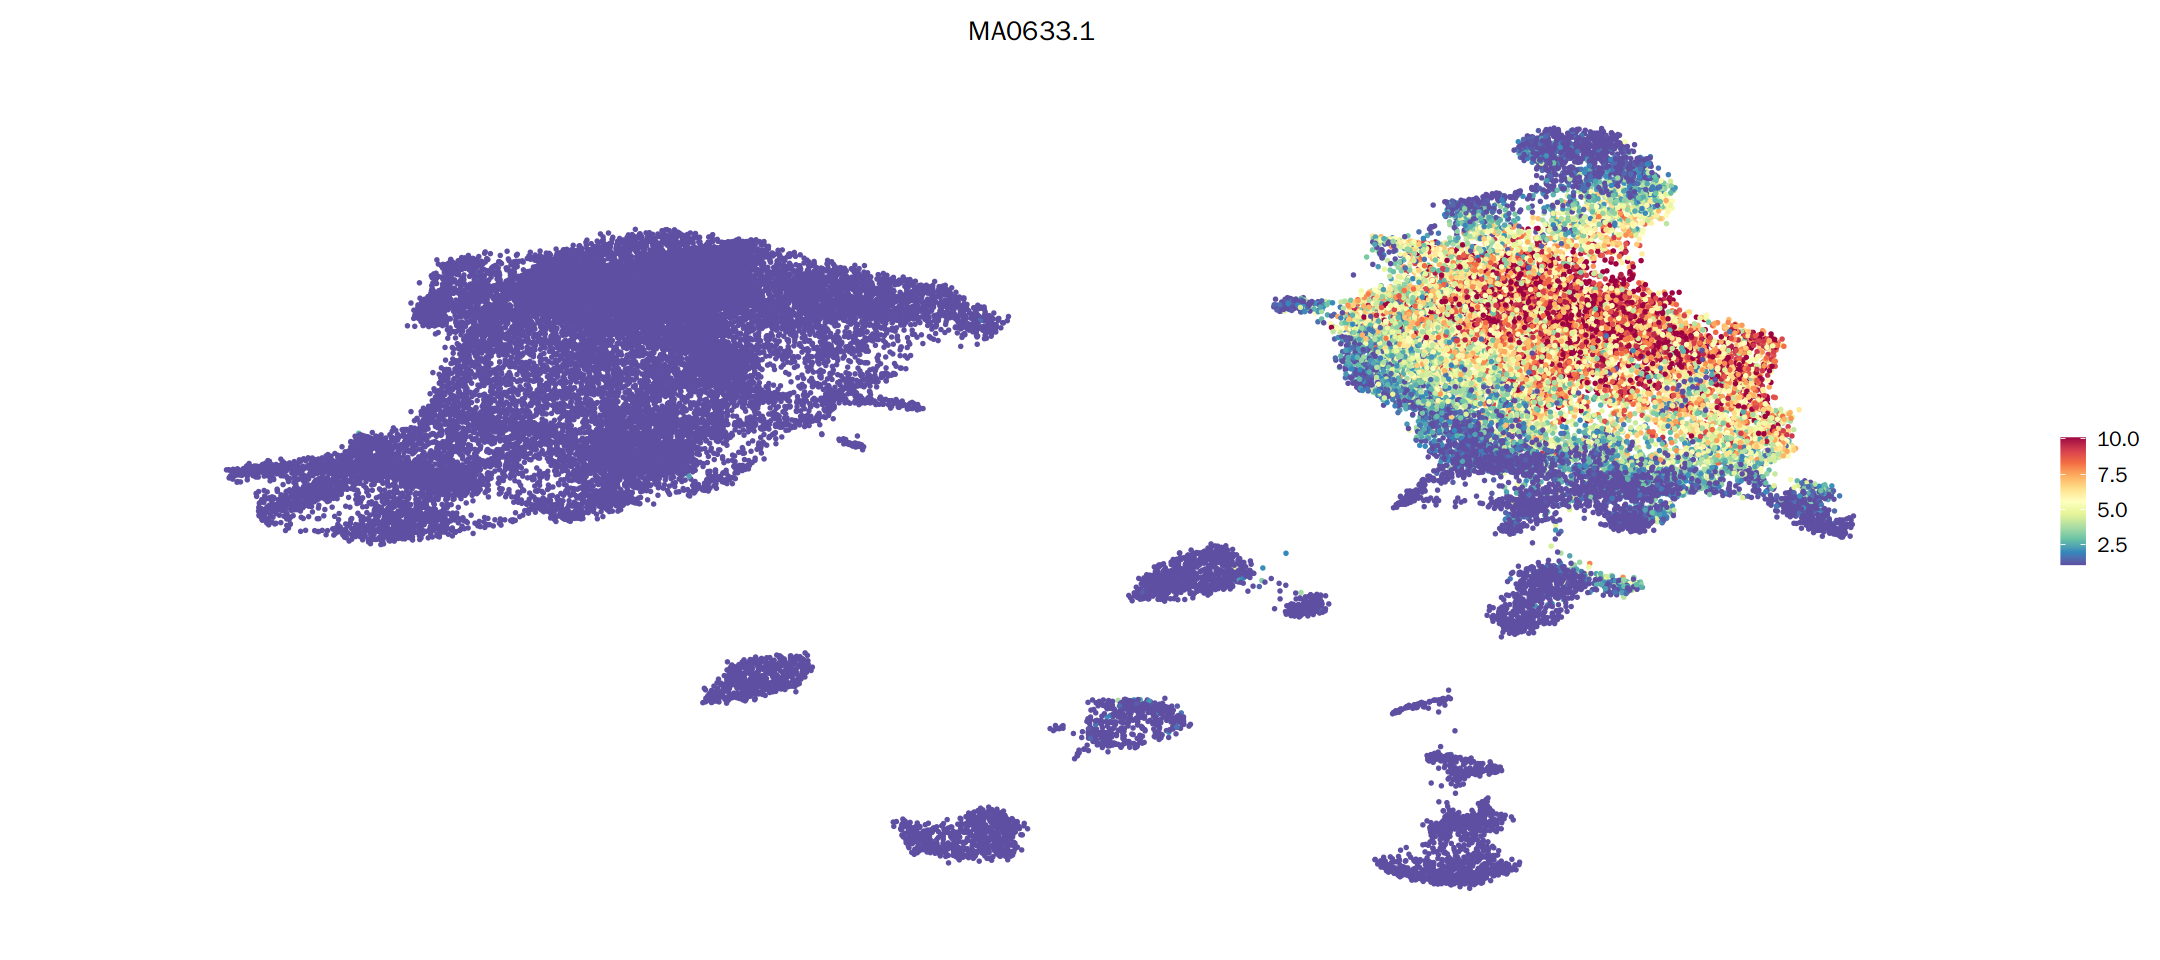

In [18]:
# look at the activity of TWIST2
p2 <- FeaturePlot(
  object = skin,
  features = "MA0633.1",
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.5
) +NoAxes() + scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral")))


p2

In [19]:
ggsave("./Fig3_rxiv/MOTIF.UMAP.TWIST2-4.svg", width =12, height =8)

In [18]:
options(repr.plot.width = 12, repr.plot.height = 8)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


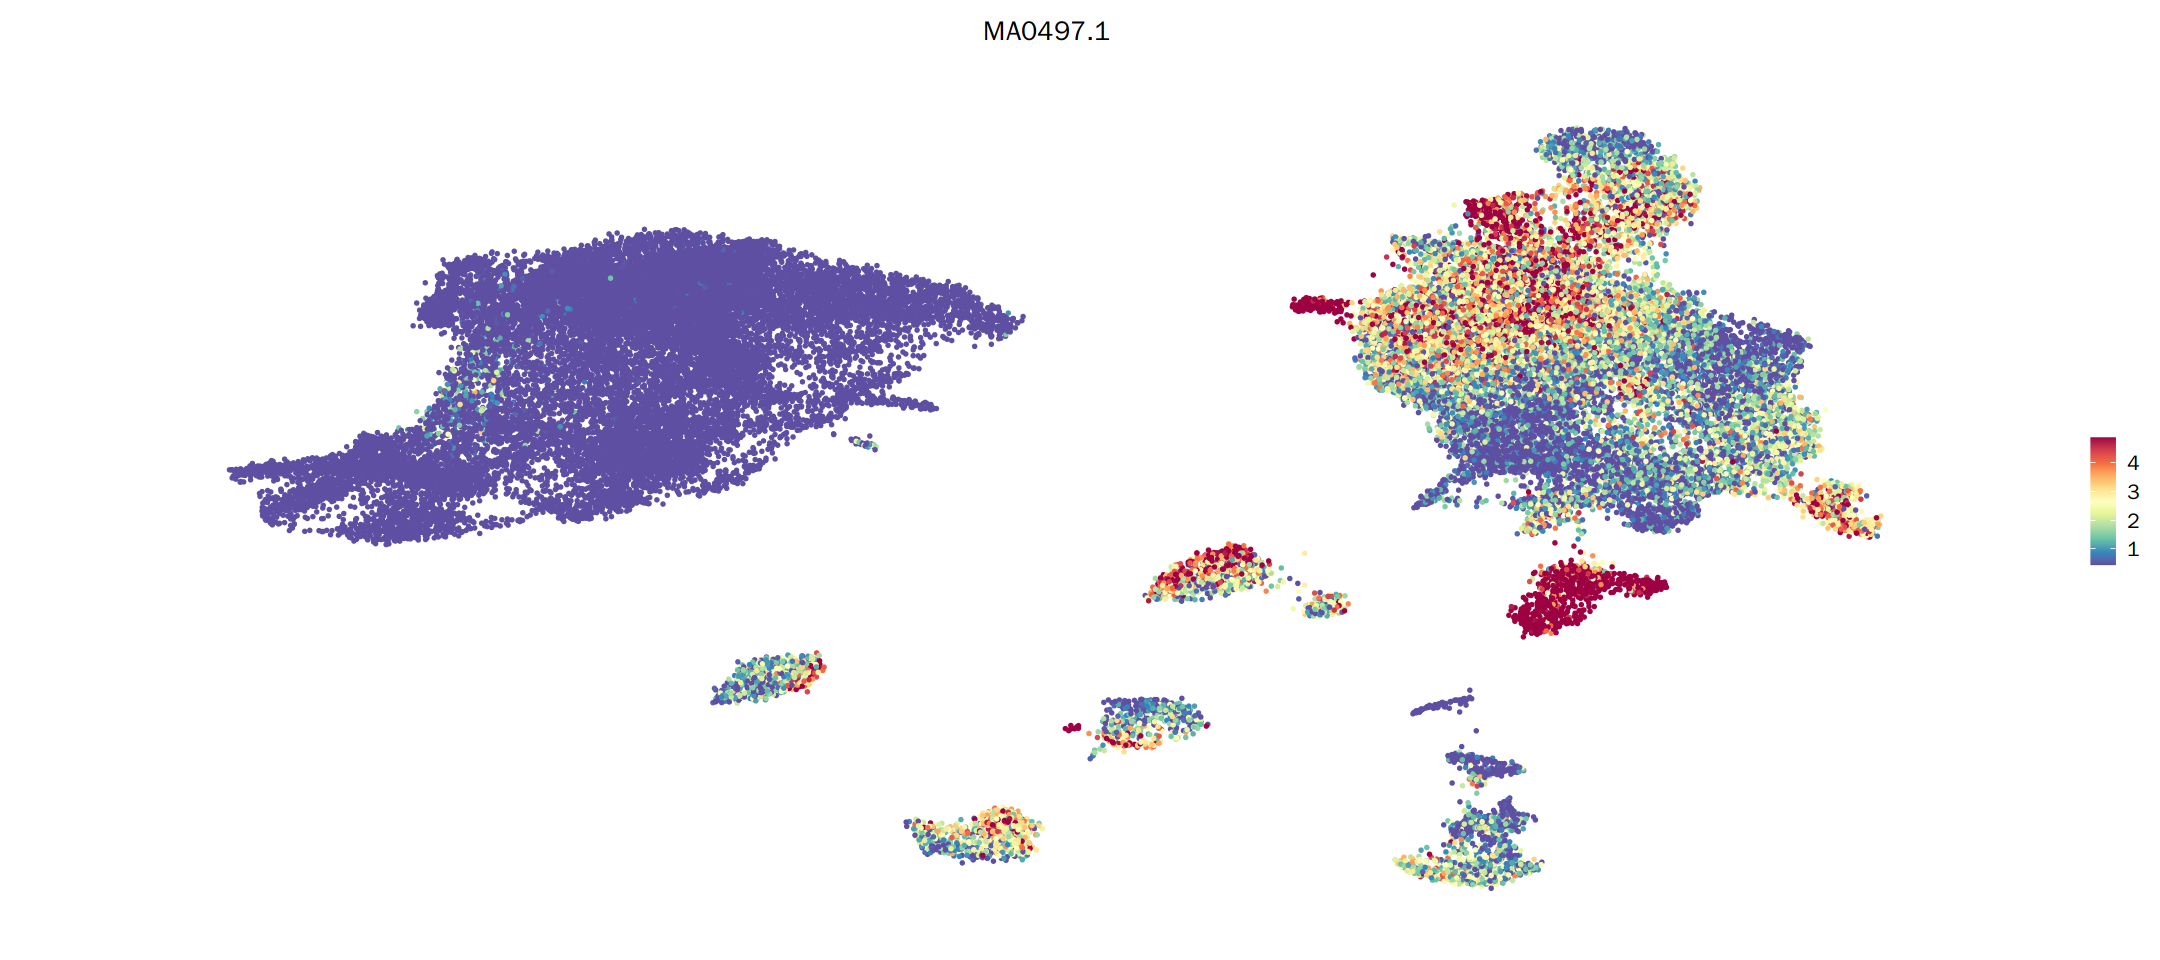

In [20]:
# look at the activity of MEF2C
p2 <- FeaturePlot(
  object = skin,
  features = "MA0497.1",
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.5
)  +NoAxes() + scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral")))

p2

In [21]:
ggsave("./Fig3_rxiv/MOTIF.UMAP.MEF2C-4.svg", width =12, height =8)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


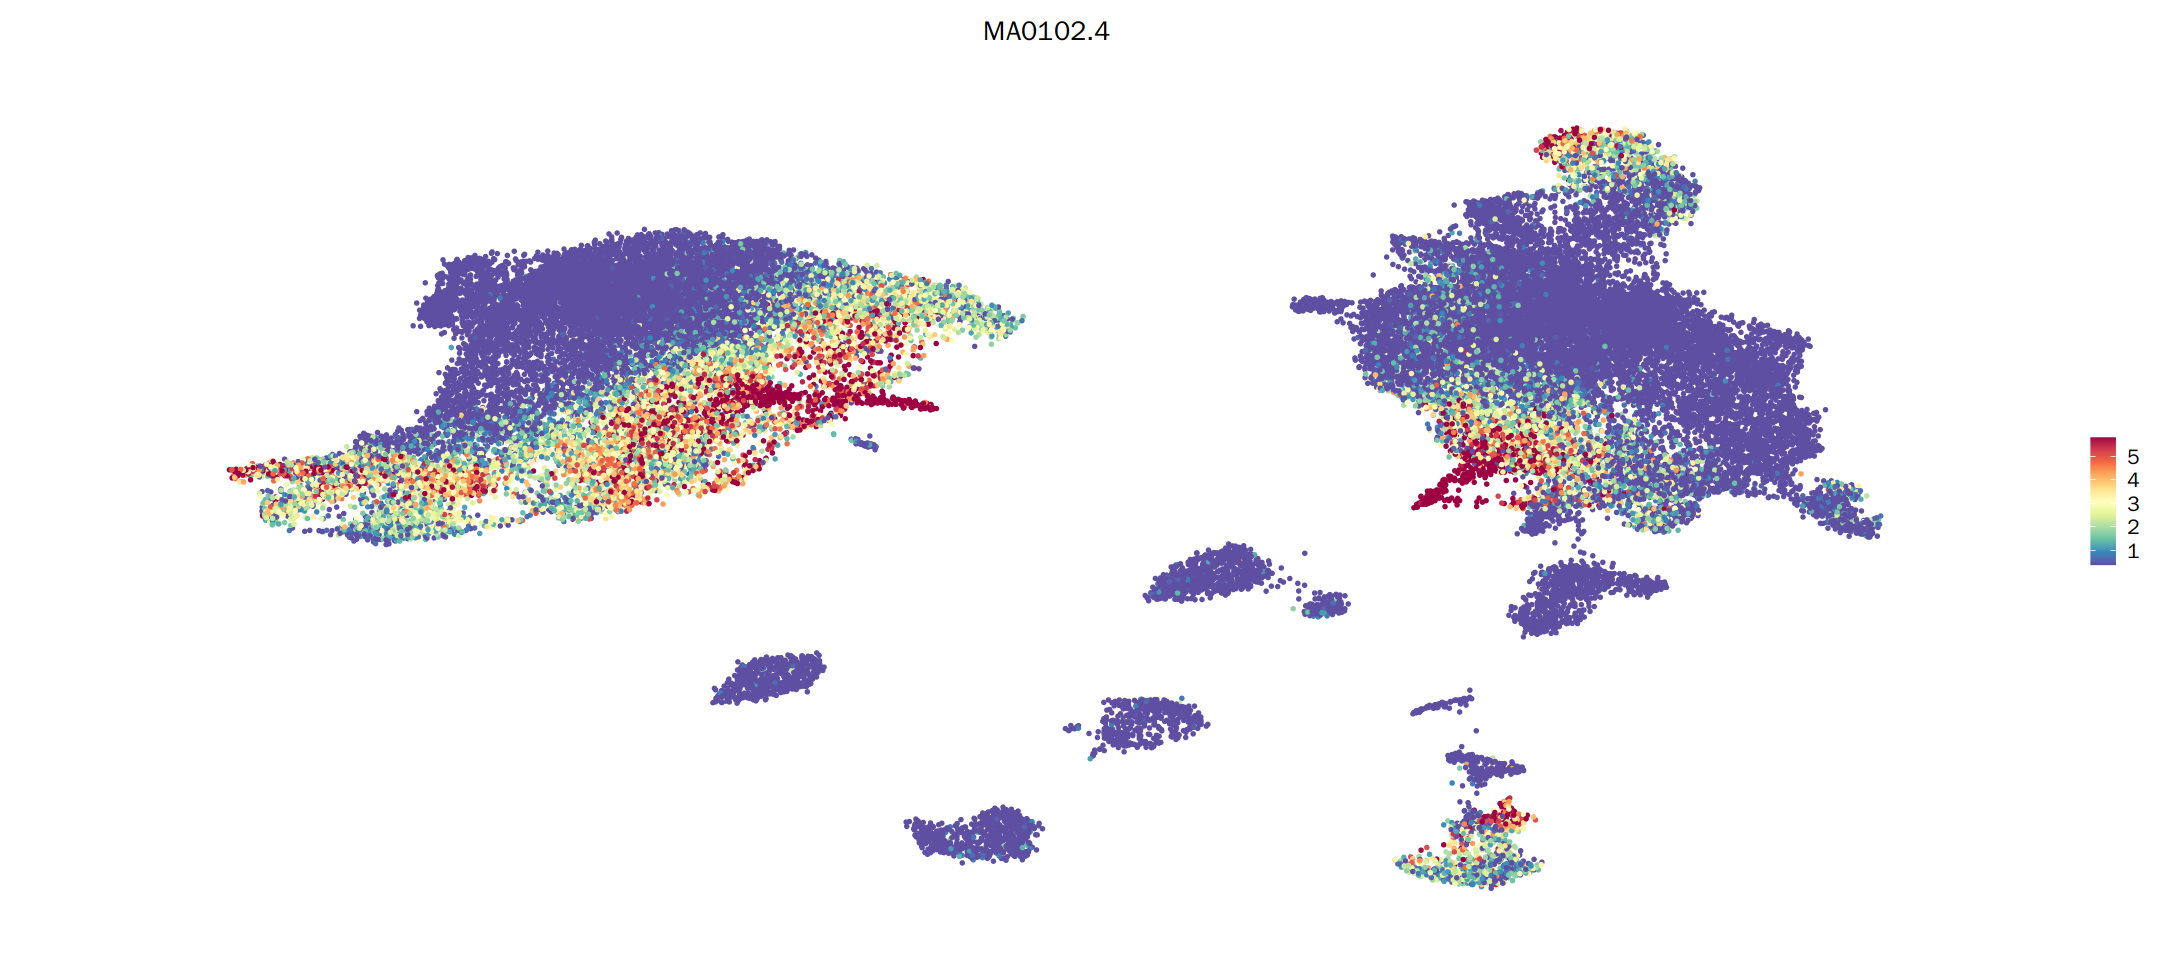

In [30]:
# look at the activity of cebpa
p2 <- FeaturePlot(
  object = skin,
  features = "MA0102.4",
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.5
) +NoAxes() + scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral")))


p2

In [31]:
ggsave("./Fig3_rxiv/MOTIF.UMAP.CEBPA.svg", width =12, height =8)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


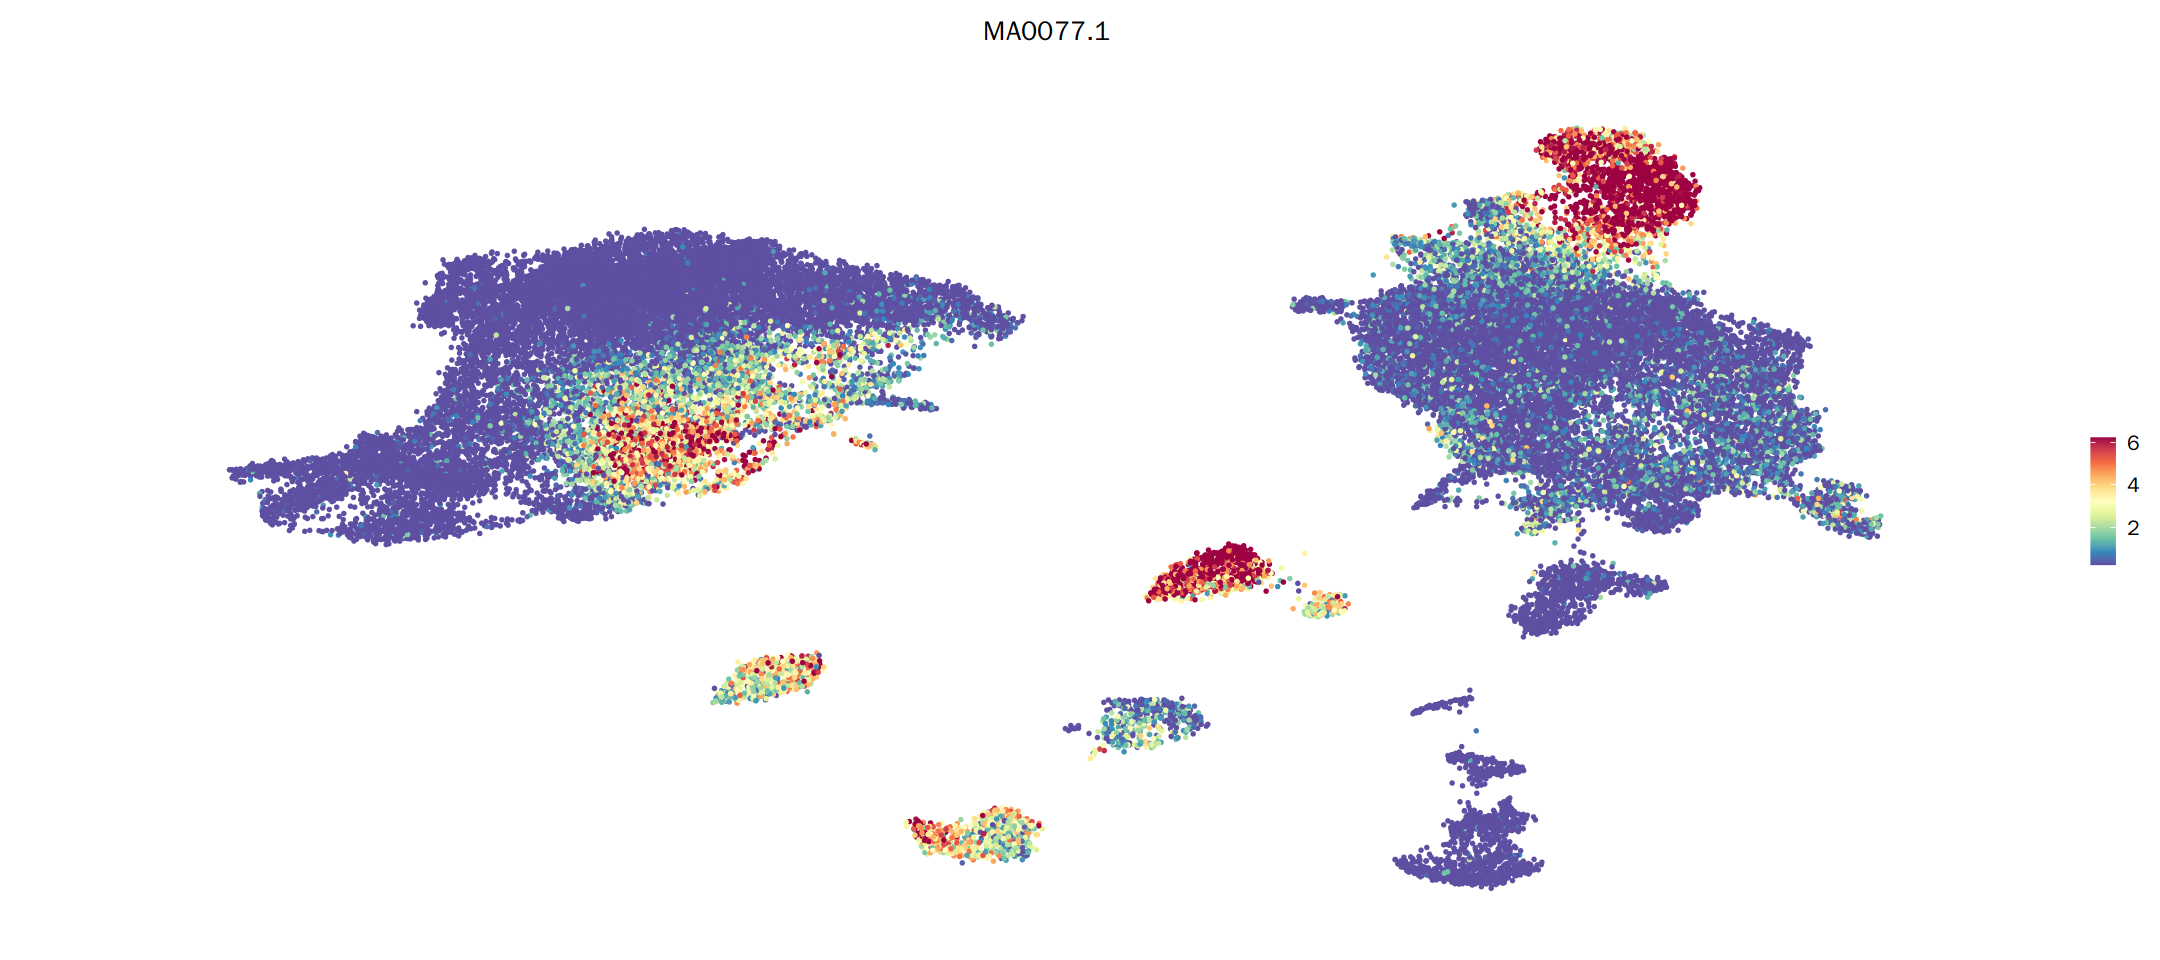

In [32]:
# look at the activity of Sox9
p2 <- FeaturePlot(
  object = skin,
  features = "MA0077.1",
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.5
)  +NoAxes() + scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral")))


p2

In [33]:
ggsave("./Fig3_rxiv/MOTIF.UMAP.SOX9.svg", width =12, height =8)

In [22]:
options(repr.plot.width = 18, repr.plot.height = 8)

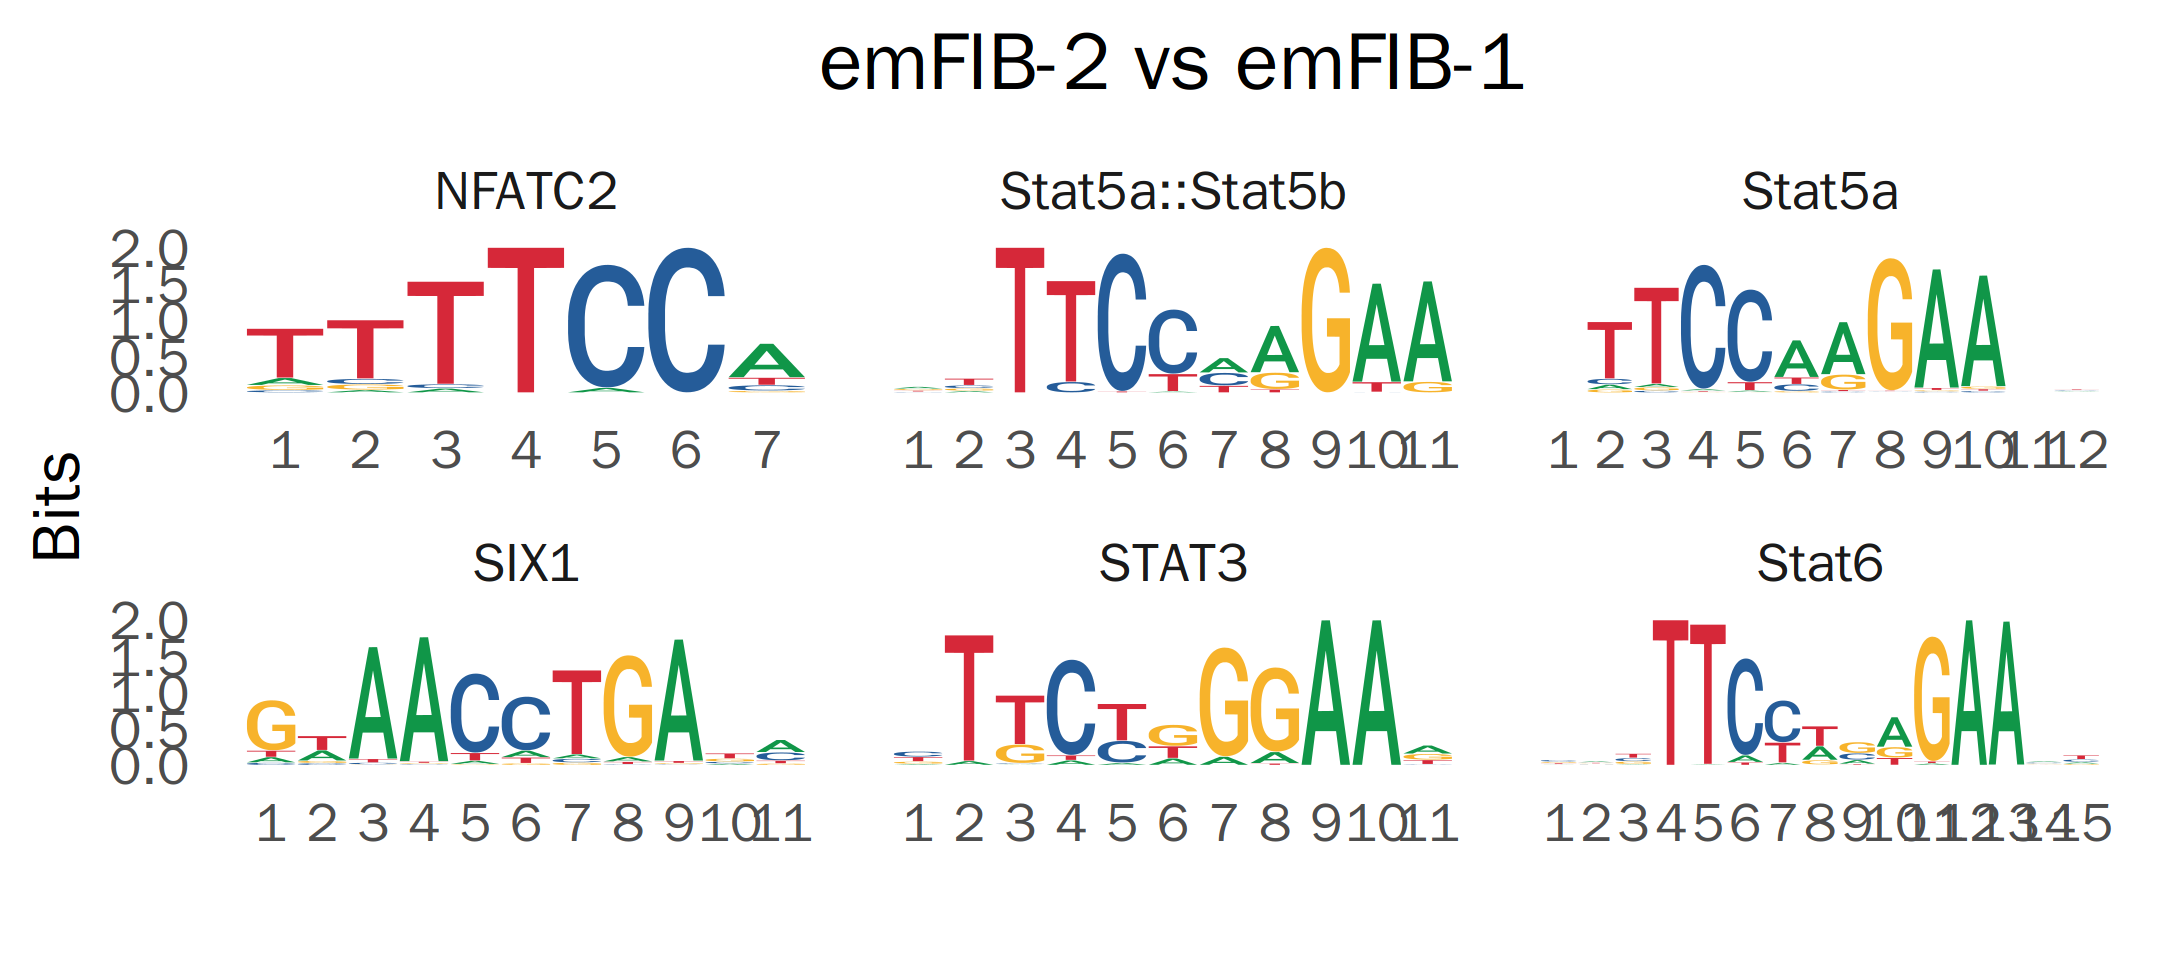

In [23]:
ident1 <- "emFIB-2"
ident2 <- "emFIB-1"

differential.activity <- FindMarkers(
  object = skin,
  ident.1 = ident1,
  ident.2 = ident2,
  only.pos = TRUE,
  mean.fxn = rowMeans,
  fc.name = "avg_diff", min.pct=0.5
)

MotifPlot(
  object = skin,
  motifs = rownames(differential.activity)[1:6],
  assay = 'peaks'
) +theme_minimal(base_size = 40) + ggtitle(paste(ident1, "vs", ident2)) + theme(plot.title = element_text(hjust = 0.5), panel.grid = element_blank())

In [24]:
head(differential.activity)

p_val         avg_diff pct.1 pct.2 p_val_adj    
MA0152.1  0.000000e+00 2.178206 0.984 0.752  0.000000e+00
MA0519.1 4.984854e-279 1.735462 0.828 0.321 3.718701e-276
MA1624.1 1.446853e-274 1.762714 0.862 0.383 1.079352e-271
MA1118.1 5.774061e-273 1.949699 0.904 0.432 4.307449e-270
MA0144.2 5.721109e-270 1.664244 0.912 0.503 4.267948e-267
MA0520.1 1.482911e-265 1.683283 0.934 0.572 1.106252e-262

In [ ]:
opts <- list(collection = "CORE", tax_group = 'vertebrates', all_versions = FALSE) 
jaspar_motifs <- getMatrixSet(JASPAR2020, opts)

motif_lookup <- data.frame(
  ID = sapply(jaspar_motifs, name),  # Motif IDs
  Name = names(jaspar_motifs)        # Corresponding gene names
)

head(motif_lookup)

In [ ]:
differential.activity$ID <- motif_lookup$ID[match(rownames(differential.activity), rownames(motif_lookup))]

head(differential.activity)

In [ ]:
ggsave(
  filename = paste0("./Fig3_rxiv/motif_", ident1, "_", ident2, ".motif2.svg"),
  width = 18,
  height = 8
)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


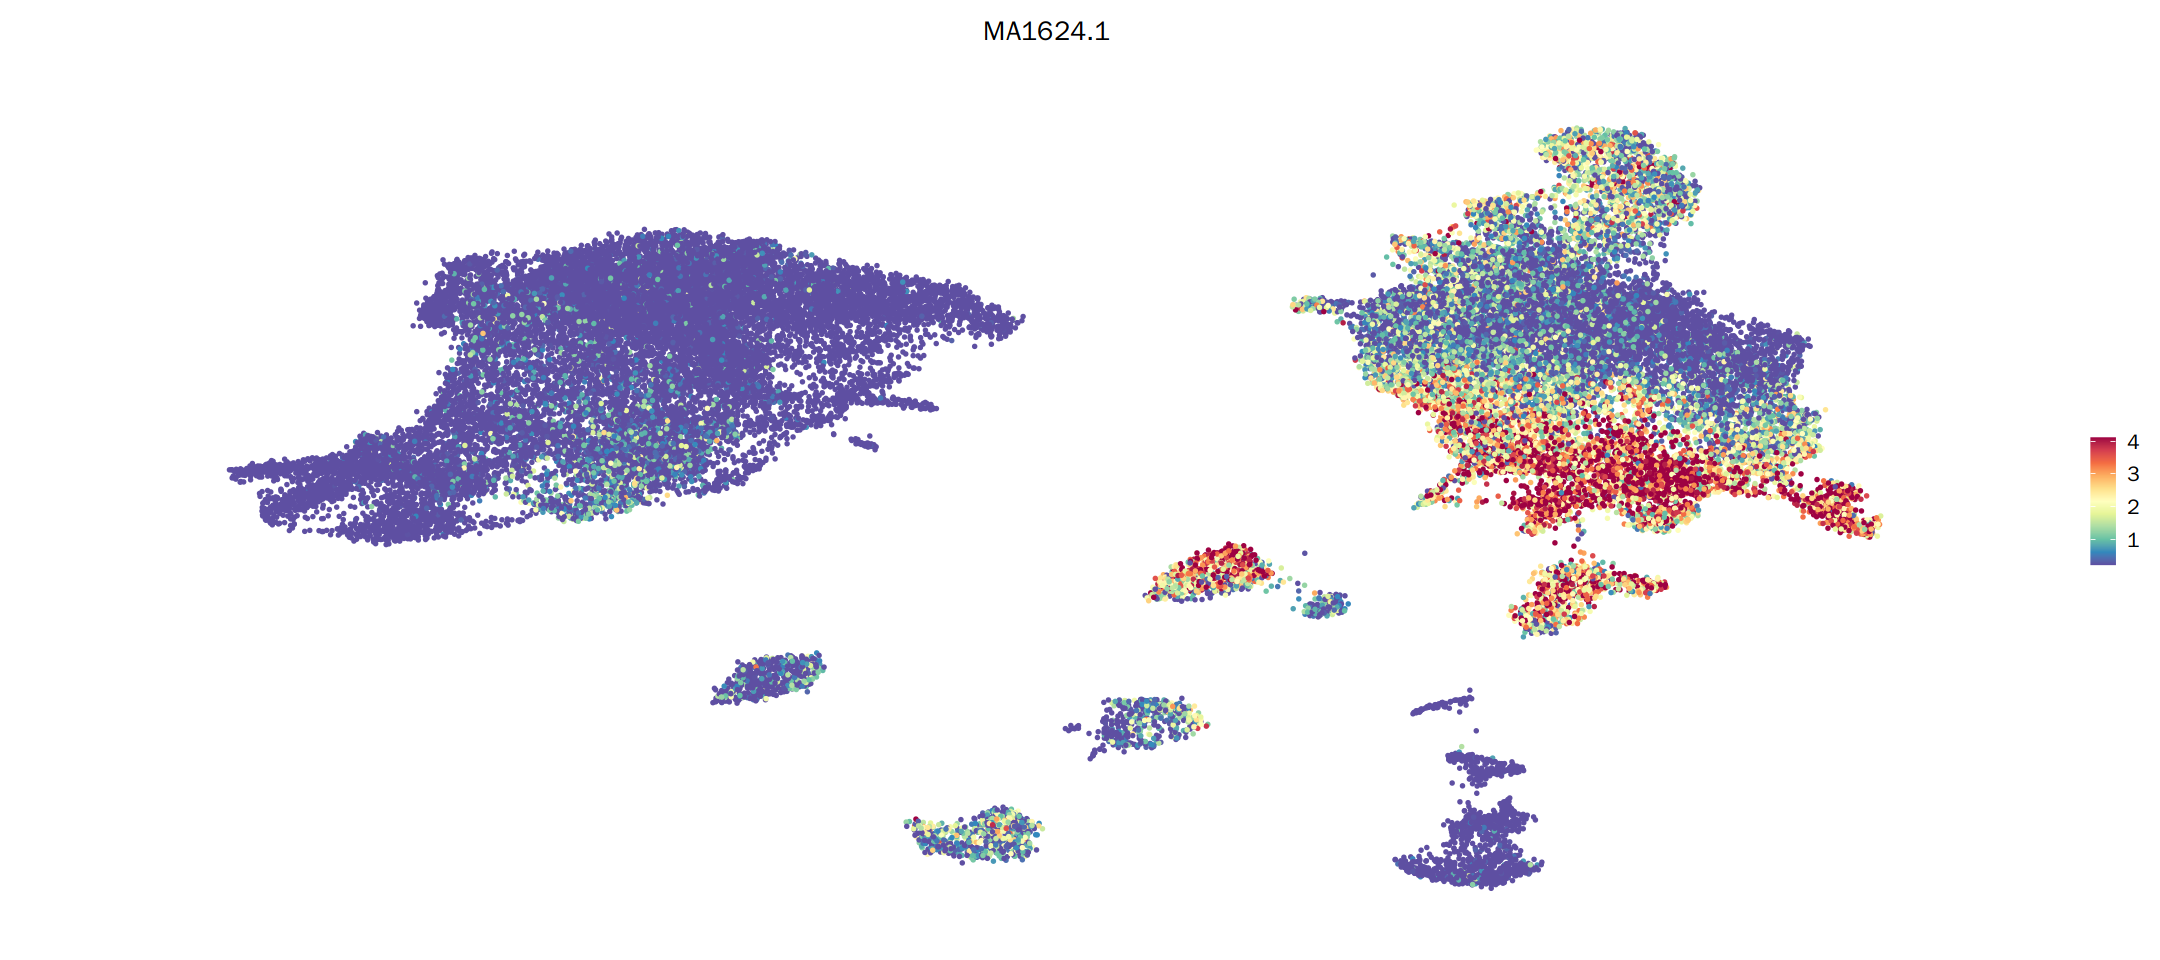

In [28]:
# look at the activity of stat5a
p2 <- FeaturePlot(
  object = skin,
  features = "MA1624.1",
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.5
)  +NoAxes() + scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral")))


p2

In [29]:
ggsave("./Fig3_rxiv/MOTIF.UMAP.STAT5A.svg", width =12, height =8)

In [ ]:
#label transfer figure

In [2]:
skin <- readRDS("./RDS/240522.E13_PD4_integrated.2-10.reference.motif.chromvar.newcluster.rds")

In [3]:
skin

필요한 패키지를 로딩중입니다: SeuratObject

필요한 패키지를 로딩중입니다: sp

필요한 패키지를 로딩중입니다: Signac



An object of class Seurat 
361458 features across 45406 samples within 3 assays 
Active assay: peaks (338904 features, 338904 variable features)
 2 other assays present: RNA, chromvar
 3 dimensional reductions calculated: lsi, umap, peakvi

In [4]:
DefaultAssay(skin) <- "RNA"

In [6]:
library(Signac)
library(Seurat)
library(ggplot2)
library(patchwork)
set.seed(1234)

In [7]:
library(TFBSTools)
library(JASPAR2020)
library(motifmatchr)

In [8]:
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [9]:
library(RColorBrewer)

In [10]:
library(future)

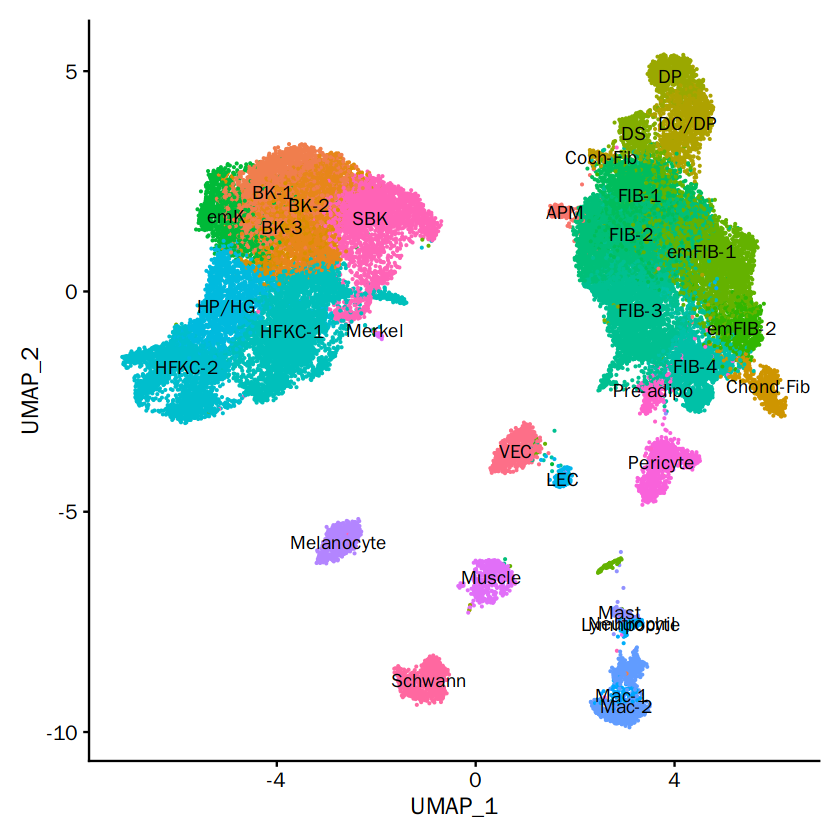

In [11]:
DimPlot(skin, reduction = "umap", label = TRUE, pt.size = 0.1) + NoLegend()

In [20]:
use_color <-c("#ffc486", "#c68441", "#c6c640", "#4c77ab", "#f98284", 
  "#d36a6a", "#75c047", "#d7d0e6", "#be80be", "#d37fa7",
  "#d9d482", "#a8d37f", "#99d5c9", "#aea3d0", "#f6b6d3",
  "#8097cd", "#419dc4", "#8dcad7", "#abdda4", "#d9c8bf",
  "#53bcaa", "#b0a9e4", "#accce4", "#b3e3da", "#feaae4",
  "#87a889", "#b0eb93", "#d0d100", "#49a131", "#1f824c",
  "#00979c", "#808080", "#64b6db"
)

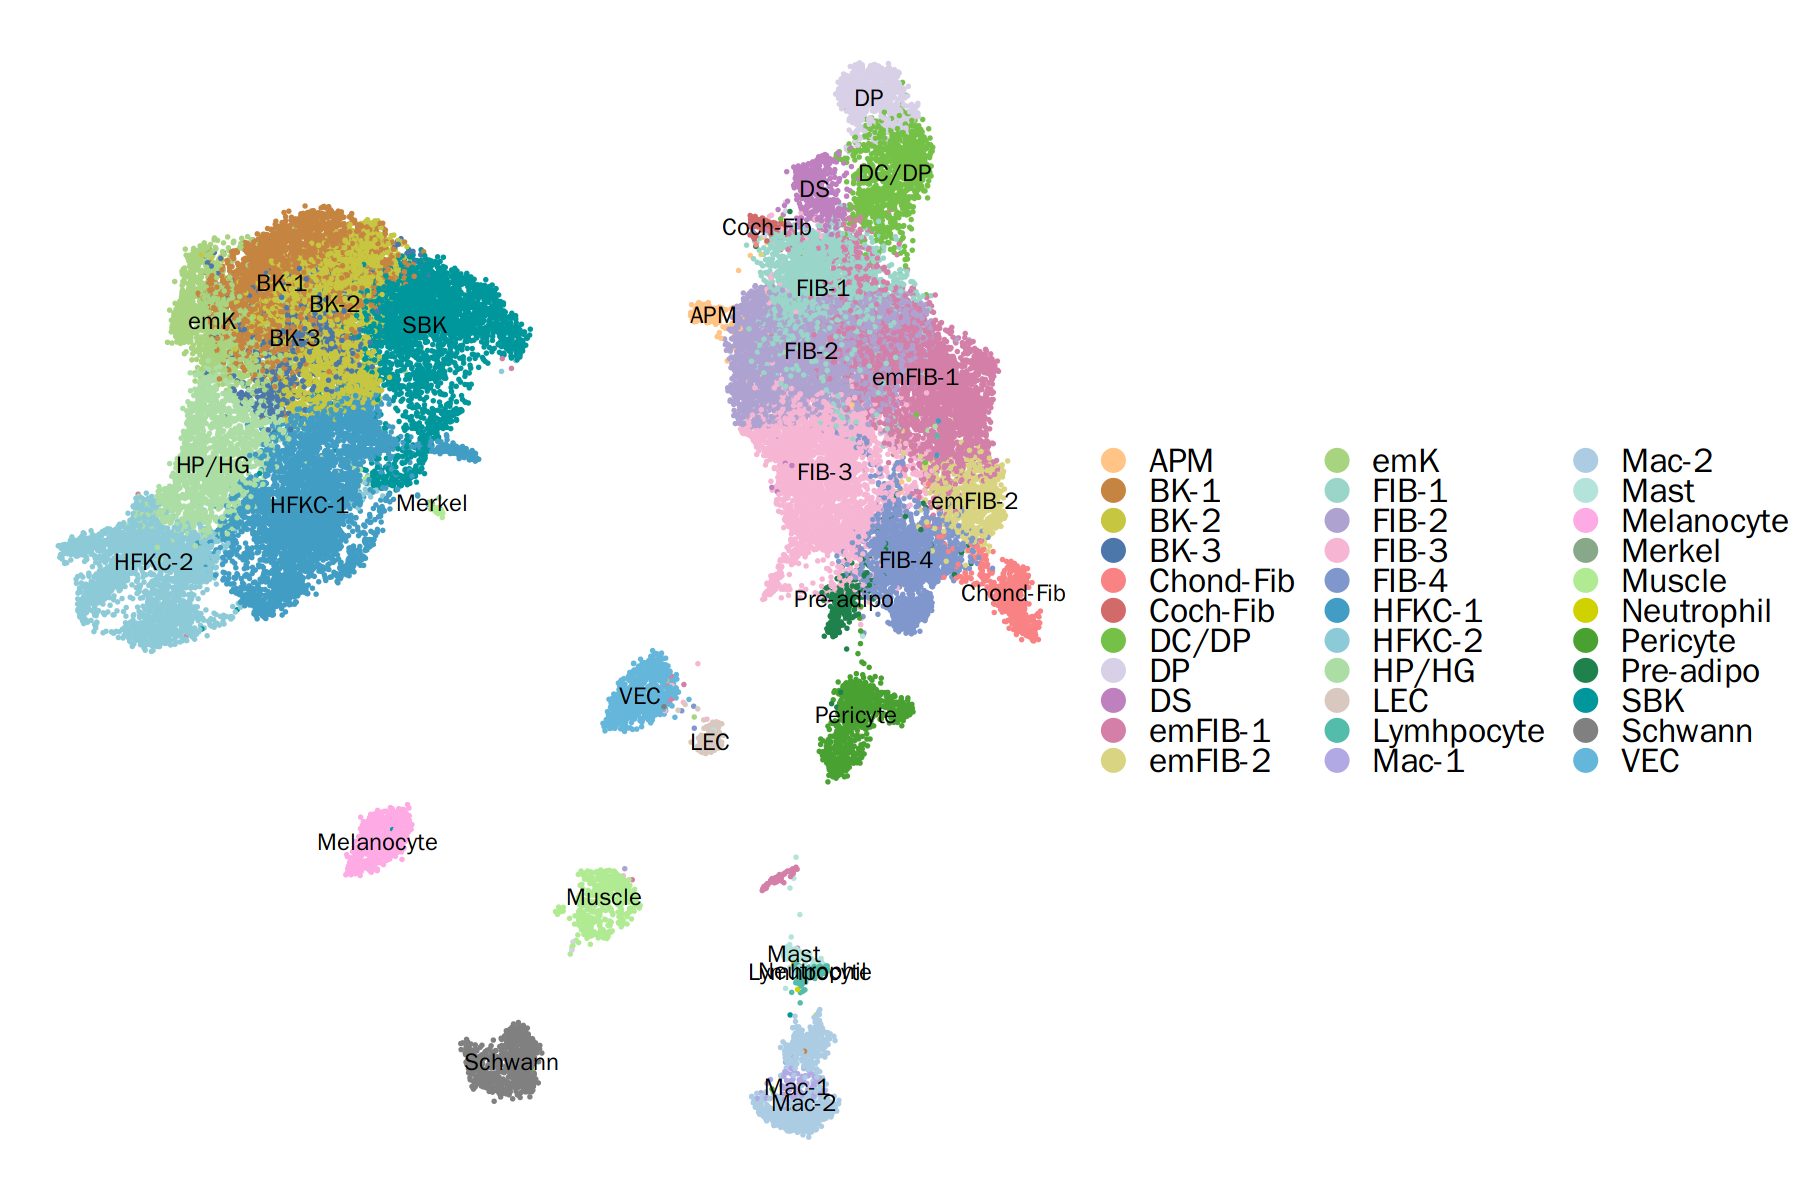

In [24]:
options(repr.plot.width=15, repr.plot.height=10)
DimPlot(object = skin, label = TRUE, pt.size = 0.5, label.size=5, cols=use_color) + guides(color = guide_legend(override.aes = list(size=6), ncol=3) ) +theme_void(base_size = 25) +NoAxes() + theme(legend.position = 'right')


In [25]:
ggsave("250302.UMAP.REF.svg",width =15, height =10, dpi=300)